## Quick Demo: spatial domains and global structure simulation

In this demo, we present SimSpace's ability to simulate the large-scale spatial pattern using MRF or customized designs.

In [4]:
import simspace as ss
import pandas as pd
import numpy as np

In [5]:
shape = (100, 100)
params = ss.util.generate_random_parameters(
    n_group=3,
    n_state=8,
    seed=42,
)

In [16]:
n_group = params['n_group']
n_state = params['n_state']

theta_list = []
for i in range(n_group):
    theta_tmp = np.zeros((n_state, n_state))
    theta_tmp[np.triu_indices(n_state, 1)] = params['theta_list'][i]
    theta_tmp = theta_tmp + theta_tmp.T - np.diag(theta_tmp.diagonal())
    np.fill_diagonal(theta_tmp, 1)
    theta_list.append(theta_tmp)

In [ ]:
sim = ss.SimSpace(
    shape = shape,
    num_states = params['n_state'],
    theta=theta_list,
    phi=params['phi_replicates'],
    random_seed=42,
    )
sim.initialize()   # Initialize the grid

### Create niches through MRF domain design

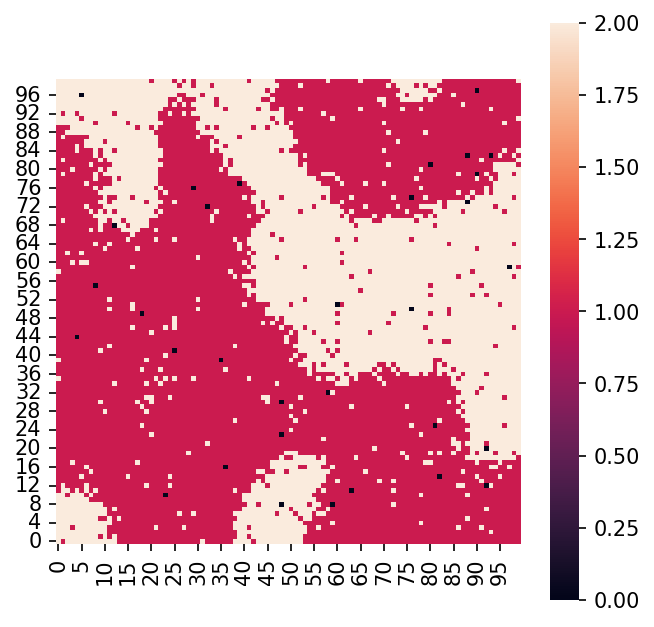

In [18]:
niche_theta = np.zeros((n_group, n_group))
niche_theta[np.triu_indices(n_group, 1)] = params['niche_theta']
niche_theta = niche_theta + niche_theta.T - np.diag(niche_theta.diagonal())
np.fill_diagonal(niche_theta, 1)

sim.create_niche(theta_niche=niche_theta)
sim.plot_niche()

### Or, one can customize the domains through functions